In [1]:
import tensorflow as tf

In [2]:
pysical_device = tf.config.list_physical_devices('GPU')
print(pysical_device)

[]


In [3]:
print(tf.__version__)

2.12.0


In [4]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      1.4.0
aiohttp                      3.8.4
aiosignal                    1.3.1
asttokens                    2.2.1
astunparse                   1.6.3
async-timeout                4.0.2
attrs                        23.1.0
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.5.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
datasets                     2.13.0
debugpy                      1.6.7
decorator                    5.1.1
dill                         0.3.6
executing                    1.2.0
filelock                     3.12.0
flatbuffers                  23.5.26
fonttools                    4.39.4
frozenlist                   1.3.3
fsspec                       2023.6.0
gast                         0.4.

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np

### Remove Dodgy images

In [6]:
import cv2
import imghdr

C:\Users\Salman\AppData\Local\Temp\ipykernel_17988\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
print(cv2.__version__)

4.8.0


In [8]:
data_dir = 'data'

In [9]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [10]:
os.listdir(data_dir)

['happy', 'sad']

In [11]:
os.listdir(os.path.join(data_dir, "happy"))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450

### Remove any Image less that 10Kb

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f"Image not exist in list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with the image {image_path}")



In [13]:
img = cv2.imread(os.path.join("data", "happy","_happy_jumping_on_beach-40815.jpg"))

In [14]:
img

array([[[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [135, 144, 217],
        [134, 143, 216],
        [134, 143, 216]],

       [[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [135, 144, 217],
        [135, 144, 217],
        [134, 143, 216]],

       [[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [134, 146, 218],
        [133, 145, 217],
        [133, 145, 217]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   2,   0],
        [  3,   1,   0],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   0],
        [  1,   2,   0],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   0],
        [  1,   2,   0],
        [  0,   2,   0]]

In [15]:
img.shape

(213, 320, 3)

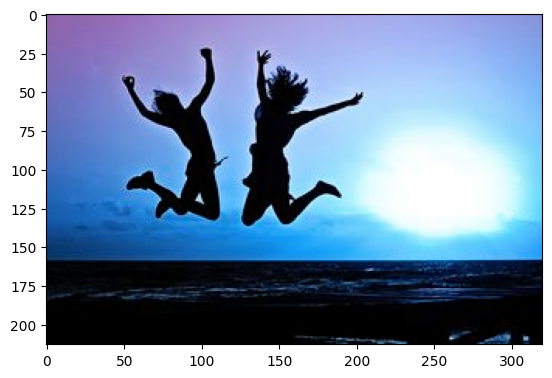

In [16]:
plt.imshow(img)

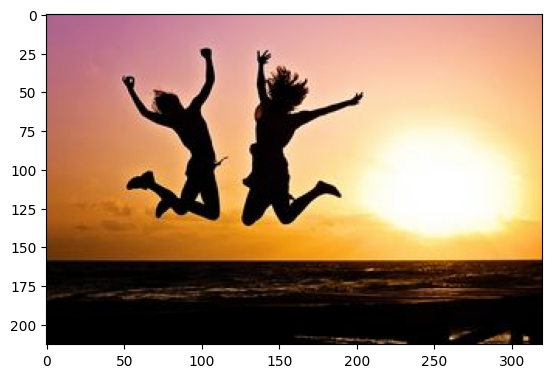

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### Load Data

In [18]:
tf.data.Dataset?
#tf.data.Dataset.list_files

Init signature: tf.data.Dataset(variant_tensor)
Docstring:     
Represents a potentially large set of elements.

The `tf.data.Dataset` API supports writing descriptive and efficient input
pipelines. `Dataset` usage follows a common pattern:

1. Create a source dataset from your input data.
2. Apply dataset transformations to preprocess the data.
3. Iterate over the dataset and process the elements.

Iteration happens in a streaming fashion, so the full dataset does not need to
fit into memory.

Source Datasets:

The simplest way to create a dataset is to create it from a python `list`:

>>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
>>> for element in dataset:
...   print(element)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)

To process lines from files, use `tf.data.TextLineDataset`:

>>> dataset = tf.data.TextLineDataset(["file1.txt", "file2.txt"])

To process records written in the `TFRecord` format, use `TF

In [19]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [20]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [44]:
data_iterator = data.as_numpy_iterator()

In [45]:
data_iterator

In [46]:
batch = data_iterator.next()

In [47]:
len(batch)

2

In [48]:
batch[0].shape

(32, 256, 256, 3)

In [49]:
batch[1]

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

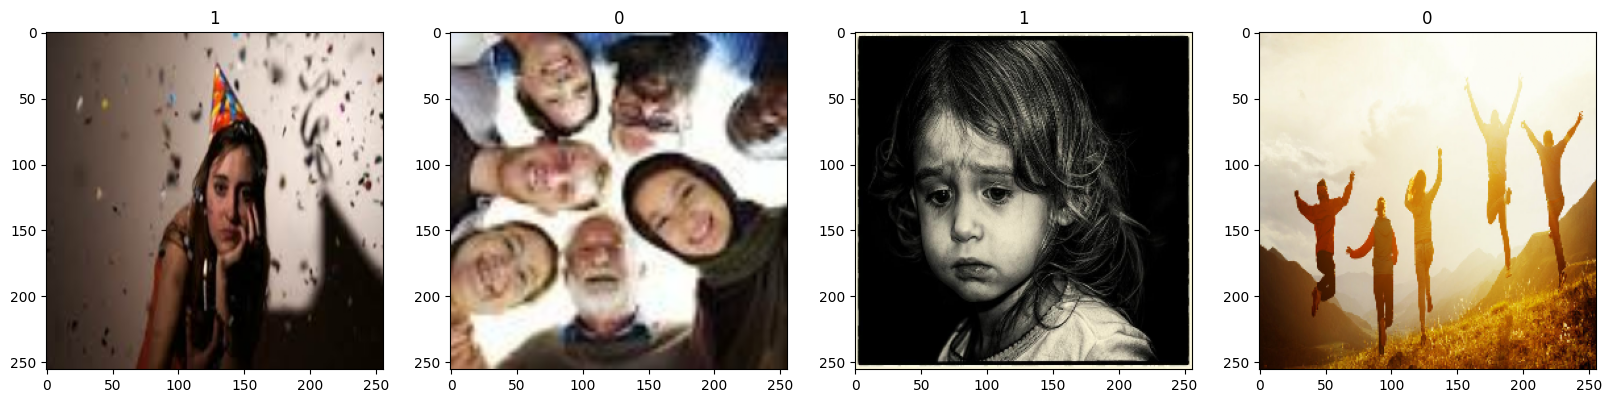

In [50]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Data Preprocessing

In [28]:
data = data.map(lambda x, y: (x/255,y))

In [57]:
scaled_interator = data.as_numpy_iterator()

In [58]:
batch = scaled_interator.next()

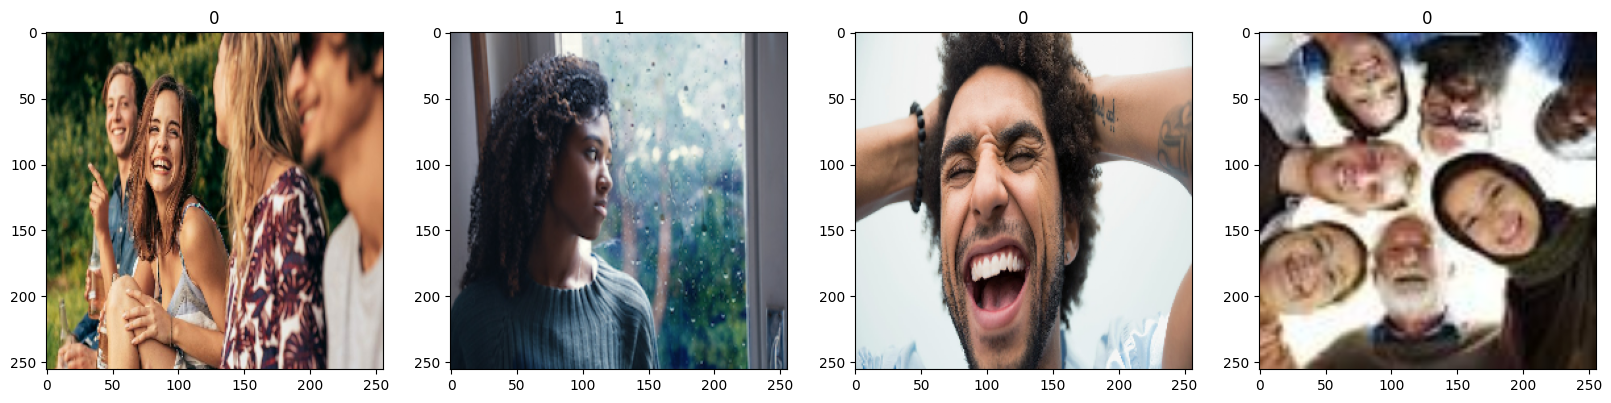

In [59]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [60]:
batch[0].max()

1.0

In [61]:
batch[0].min()

0.0

### Split Data

In [62]:
len(data)

10

In [63]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size= int(len(data)*.1)

In [64]:
(train_size, val_size, test_size)

(7, 2, 1)

In [65]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+ val_size).take(test_size)

In [67]:
(len(train), len(val), len(test))

(7, 2, 1)

### Build Deep Learning Model

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [69]:
model= Sequential()

In [71]:
model.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [72]:
model.compile("adam", loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Logs


In [74]:
logdir = 'logs'

In [75]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [76]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 13s 988ms/step - loss: 0.6923 - accuracy: 0.5089 - val_loss: 0.6772 - val_accuracy: 0.6719
Epoch 2/20
7/7 [==============================] - 8s 930ms/step - loss: 0.6748 - accuracy: 0.5804 - val_loss: 0.6505 - val_accuracy: 0.6250
Epoch 3/20
7/7 [==============================] - 7s 903ms/step - loss: 0.6502 - accuracy: 0.6205 - val_loss: 0.5834 - val_accuracy: 0.6719
Epoch 4/20
7/7 [==============================] - 8s 961ms/step - loss: 0.5926 - accuracy: 0.7232 - val_loss: 0.5322 - val_accuracy: 0.7656
Epoch 5/20
7/7 [==============================] - 8s 968ms/step - loss: 0.5051 - accuracy: 0.7589 - val_loss: 0.5042 - val_accuracy: 0.7656
Epoch 6/20
7/7 [==============================] - 8s 931ms/step - loss: 0.4591 - accuracy: 0.7812 - val_loss: 0.3193 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 7s 904ms/step - loss: 0.4239 - accuracy: 0.7902 - val_loss: 0.3339 - val_accuracy: 0.8906
Epoch 8/20
7/7 [===

In [77]:
hist

In [78]:
hist.history

{'loss': [0.6923359632492065,
  0.6747831702232361,
  0.6502151489257812,
  0.592564582824707,
  0.5050530433654785,
  0.45909661054611206,
  0.4239121377468109,
  0.4572494328022003,
  0.405224472284317,
  0.43044596910476685,
  0.35677722096443176,
  0.34348025918006897,
  0.3185367286205292,
  0.33777958154678345,
  0.3233157694339752,
  0.31481626629829407,
  0.2657725512981415,
  0.219214528799057,
  0.22586193680763245,
  0.18851277232170105],
 'accuracy': [0.5089285969734192,
  0.5803571343421936,
  0.6205357313156128,
  0.7232142686843872,
  0.7589285969734192,
  0.78125,
  0.7901785969734192,
  0.78125,
  0.8169642686843872,
  0.7991071343421936,
  0.8571428656578064,
  0.84375,
  0.8928571343421936,
  0.8616071343421936,
  0.8616071343421936,
  0.8660714030265808,
  0.9107142686843872,
  0.9241071343421936,
  0.9151785969734192,
  0.9375],
 'val_loss': [0.6771899461746216,
  0.6505436897277832,
  0.5833778381347656,
  0.5321803092956543,
  0.5041994452476501,
  0.319299817085

#### Plot Performance

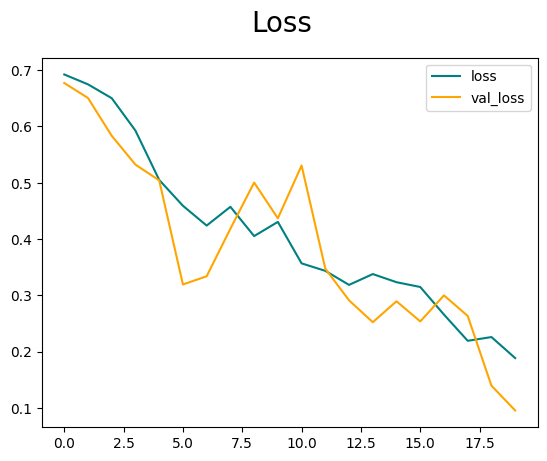

In [81]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label= 'loss')
plt.plot(hist.history['val_loss'], color= 'orange', label= 'val_loss')
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper right")
plt.show() 

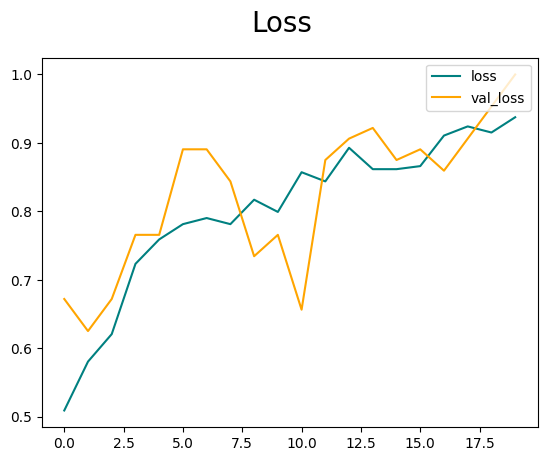

In [82]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label= 'loss')
plt.plot(hist.history['val_accuracy'], color= 'orange', label= 'val_loss')
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper right")
plt.show() 

## Evaluation

In [84]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [87]:
pre   = Precision()
re= Recall()
binacc = BinaryAccuracy()

In [88]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    binacc.update_state(y,yhat)

1/1 [==============================] - 0s 112ms/step


In [91]:
print(f'PRecion: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {binacc.result().numpy()}')

PRecion: 0.9166666865348816, Recall: 1.0, Accuracy: 0.9411764740943909


### Save the Model

In [92]:
from tensorflow.keras.models import load_model

In [93]:
model.save(os.path.join('models', 'imageclassifiernewversion.h5'))

In [94]:
new_model = load_model(os.path.join('models', 'imageclassifiernewversion.h5'))

In [95]:
new_model